<span style="font-size:30px">**Convolución en imágenes y sus aplicaciones en el proceso de filtrado en el dominio espacial: Filtros lineales de suavizado.**</span> 
    
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

# Breve introducción:

### La convolución en imágenes es el elemento matemático involucrado en el proceso de filtrado de imágenes. En este notebook vamos a ver los fundamentos de la convolución, considerándolo como una introducción a la serie de notebooks sobre filtros espaciales.

### En el repositorio de procesamiento de señales (https://github.com/Bronquivoide/Signal-Proccesing-con-Python/tree/main) abordamos la teoría sobre el operador de convolución, el cual actuaba sobre sistemas unidimensionales, pues vimos que una señal puede estar representada analíticamente mediante una función $f(t)$ o $f(n)$ (vimos el desarrollo continuo y el desarrollo discreto de la convolución). Lo que queremos en este notebook es extender la convolución vista para una señal ahora para una imagen.

### Recordemos que una imagen está formada por componentes discretas llamadas pixeles, y se representa analíticamente mediante una función de pares de coordenadas asociados a los pixeles, $f(x,y)$. Notemos que la convolución en los notebooks de señales se empezó por plantear en un dominio temporal unidimensional, hablando de imágenes, se abordará una convolución bidimensional en un dominio espacial.

### Como se mencionó antes, la convolución es importante porque es la base para el proceso de filtrado (y a su vez, el filtrado es una parte fundamental del procesamiento de imágenes), en donde la única variación que define la aplicación de un filtro u otro, son los kernels que se emplean en la convolución.

### El filtrado en el dominio espacial de una imagen toma dos cosas como punto de partida: una vecindad (rectángulo) de pixeles y una operación predefinida que actúa sobre la vecindad (abórdese el concepto de vecindad como una analogía discreta con respecto al análisis en $\mathbb{R}^n$, pues también podemos trabajar con aspectos topológicos como distancias en pixeles, que en realidad no abordaremos en este notebook).

### Sea $f(x,y)$ una imagen y consideremos un pixel $p$ en las coordenadas $(x,y)$. Comunmente se define una vecindad para $p$ mediante ocho pixeles coordenados que es el conjunto de sus pixeles vecinos inmediatos, dos horizontales, dos verticales y cuatro diagonales:

### <font size="5"> Horizontales: $ \{(x+1,y),(x-1,y)\}$</font>

### <font size="5"> Verticales: $ \{(x+1,y),(x-1,y)\}$</font>

### <font size="5"> Diagonales: $ \{(x+1,y+1),(x+1,y-1),(x-1,y+1),(x-1,y-1)\}$</font>

### A la vecindad para el pixel $p$ consistente en los ocho elementos mencionados se le denota como el conjunto $N_8 (p)$.

### Con base a lo anterior vamos a definir la convolución:

### Consideremos una imagen arbitraria $f(x,y)$ de orden $M \times N$. Sea $w$ un filtro (o máscara, o kernel, o ventana, etc.) de orden $m\times n$ que pasa por las coordenadas $w(s,t)$, tal que $m=2a+1$ y $n=2b+1$, $\forall a,b \in \mathbb{Z}^+$. Definimos la imagen de salida resultante de la convolución entre $w$ y $f$ como:

### <font size="5"> $ g(x,y)=w(x,y)\diamond f(x,y) =\sum_{s,t} w(s,t) f(x-s,y-t)$ </font> en donde <font size="5">$-a\leq s \leq a$ y $-b\leq t \leq b$</font>

### Una imagen filtrada se va generando conforme el centro del arreglo de $m \times n$ asociado al filtro $w$ va recorriendo cada pixel en la imagen de entrada. Este proceso mapea el valor de un pixel coordenado en $(x_0,y_0)$ a una salida cuyo valor es resultado de la operación específica que trabaja el filtro. Si la operación es lineal, el sistema es un filtro lineal.

### Como dice el título, lo que queremos a continuación es abordar los filtros lineales de suavizado, los cuales son usados comunmente en el proceso de desenfoque y en la reducción del ruido en las imágenes. Para ello es útil abordar la generación de un filtro lineal desde una representación vectorial:

### Consideremos la salida o respuesta que caracteriza a un filtro espacial lineal de $m \times n$ aplicado sobre una imagen de intensidades $\{z=I(x,y)\}$, $R$. A esta cantidad la vamos a definir como:

<font size="5"> $R=\begin{pmatrix}
w_1 \\
w_2 \\
\vdots \\
w_{m\cdot n}
\end{pmatrix} (z_1,z_2,\dots ,z_{m\cdot n})=\sum _{k=1}^{m\cdot n}w_k z_k=w_1z_1+w_2z_2+ \dots ,w_{m\cdot n}z_{m\cdot n}$</font>

### En donde $w_i$ son los coeficientes del filtro lineal de $m\times n$ y $z_i$ las intensidades asociadas a la imagen procesada que el filtro abarca. $R$ es el resultado del producto matricial $\vec{w}^T \vec{z}$.

### Si $w_i=\frac{1}{m\cdot n}$, $R=\frac{1}{m\cdot n}\sum _{k=1}^{m\cdot n} z_k$, es decir, la salida del filtro es un promedio de intensidades de pixeles en la vecindad del filtro. A este tipo de filtros se les conoce como filtros espaciales promediados de suavizado, o filtros pasa bajas (consultar el archivo Teoría de Filtros Digitales.pdf en el repositorio https://github.com/Bronquivoide/Signal-Proccesing-con-Python).

# Ejercicio:

### En Python vamos a implementar un filtro espacial lineal de suavizado sobre la imagen *Lena.tif* usando OpenCV, vamos a aplicar un desenfoque usando la función cv2.filter2D, la cual efectúa una convolución, efectuando el filtrado, recibiendo principalmente tres argumentos: 

### 1) Una imagen para procesar.

### 2) Una profundidad: Es un argumento sobre el formato de datos con el que se procesa la imagen. Si se asigna ddepth como -1, el formato permanece constante durante y después de la convolución (es lo que haremos).

### 3) Un kernel: Este define la operación que actuará sobre la imagen, en este caso, un proceso de desenfoque.

### cv2.filter2D convoluciona $KERNEL \diamond IMAGEN$.

### Probablemente causa ruido un aspecto sobre la vecindad asociada al filtro. ¿Qué pasa con los elementos de la vecindad localizados en una posición tal que, al estarse operando sobre un pixel, en principio quedan fuera de la imagen?:

### Podemos añadir un cuarto argumento a cv2.filter2D sobre la manipulación de bordes. El argumento borderType=cv2.BORDER_CONSTANT trabaja los valores fuera de los límites reemplazándolos con un valor constante, que por defecto es cero.

### Vamos a definir nuestro kernel, considerando un filtro de desenfoque promedio $3\times 3$, como sigue:

<font size="5"> $ \frac{1}{15} \begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{pmatrix} $</font>

### Bajo este kernel el valor de cada pixel en la nueva imagen será el promedio de los nueve pixeles en la vecindad de orden $3\times 3$.



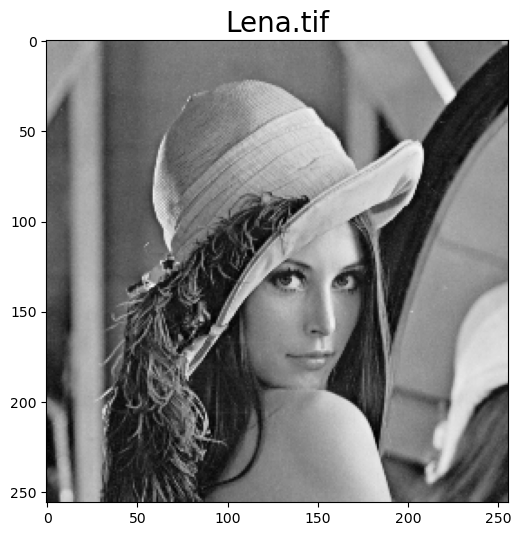

El kernel es:
 [[0.06666667 0.06666667 0.06666667]
 [0.06666667 0.06666667 0.06666667]
 [0.06666667 0.06666667 0.06666667]]


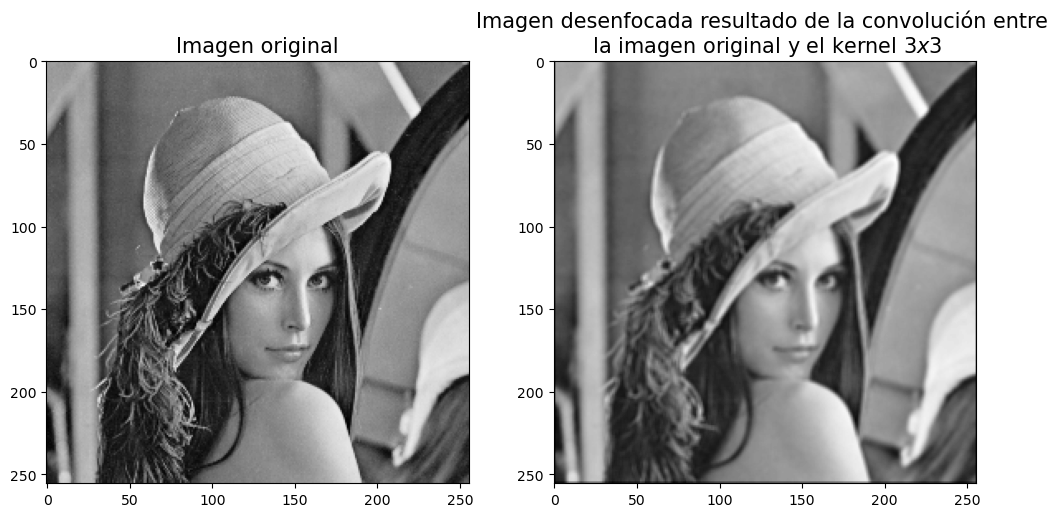

Si ahora hacemos un kernel de la misma estructura pero del orden 5x5:



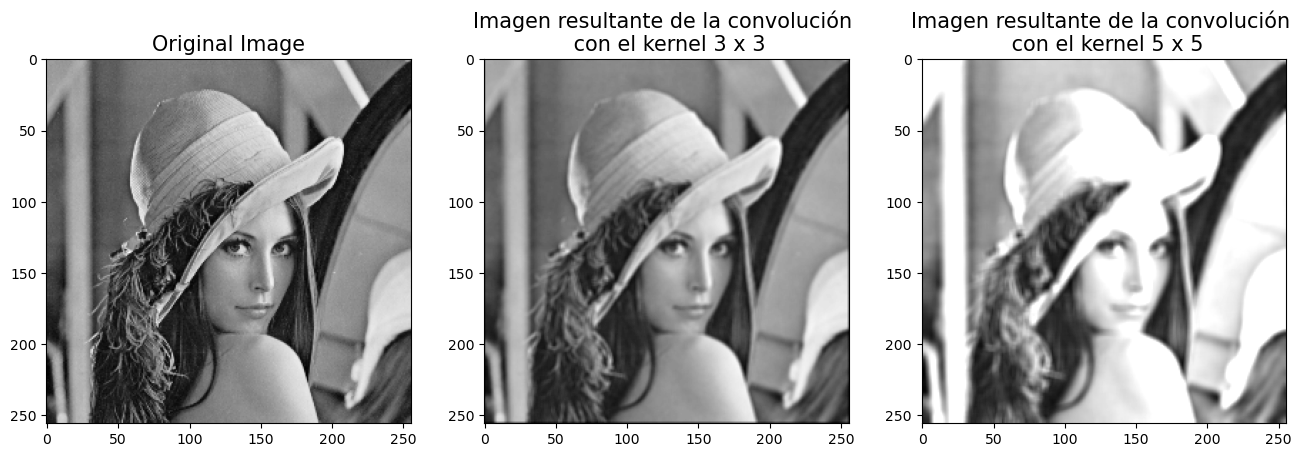

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Display de imagen:
imagen=cv2.imread('Lena.tif', 0)
plt.figure(figsize=(12,6))
plt.imshow(imagen, cmap = 'gray')
plt.title("Lena.tif",fontsize=20)
plt.show()

# Kernel 3 x 3:
kernel=np.ones(shape=(3, 3), dtype = np.float32) /15
print(f"El kernel es:\n {kernel}")

# Convolución entre el kernel y la imagen:
convolución=cv2.filter2D(imagen, -1,  kernel, borderType = cv2.BORDER_CONSTANT)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imagen, cmap = 'gray')
plt.title("Imagen original", fontsize = 15)
plt.subplot(1,2,2)
plt.imshow(convolución, cmap = 'gray')
plt.title("Imagen desenfocada resultado de la convolución entre \n la imagen original y el kernel $3 x 3$ ", fontsize = 15)
plt.show()

# Kernel 5x5:
print("Si ahora hacemos un kernel de la misma estructura pero del orden 5x5:\n")
kernel2=np.ones( shape = (5, 5), dtype = np.float32) / 15
convolución2=cv2.filter2D(imagen, -1,  kernel2) 

plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
plt.imshow(imagen, cmap = 'gray')
plt.title("Original Image", fontsize = 15)
plt.subplot(1,3,2)
plt.imshow(convolución, cmap = 'gray')
plt.title("Imagen resultante de la convolución \n con el kernel 3 x 3", fontsize = 15)
plt.subplot(1,3,3)
plt.imshow(convolución2, cmap = 'gray')
plt.title("Imagen resultante de la convolución \n con el kernel 5 x 5", fontsize = 15)
plt.show()

# Fin del ejercicio:
### Bibliografía recomendada:

### $\blacksquare$ Gonzalez, R. C., & Woods, R. E. (2008). Digital image processing (3rd ed.). Pearson.

### $\blacksquare$ Acharya, T., & Ray, A. K. (2005). Image processing: Principles and applications. Wiley-Interscience.